# Preprocessing
Use commot environment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from tqdm import tqdm
import os

sc.settings.verbosity = 1
sns.set(font_scale=1)
sc.settings.set_figure_params(dpi=150)
sns.set_style("ticks")

from matplotlib import cm
from matplotlib.colors import ListedColormap

cm_color = cm.get_cmap("Reds", 128)
cm_grey = cm.get_cmap("Greys", 128)

Reds = ListedColormap(np.vstack((
    cm_grey(np.linspace(0.2, 0.2, 1)),
    cm_color(np.linspace(0.1, 1, 128)),
)))

In [2]:
my_path="/home/felix/projects/facial/felix/data/reprocessed_data/"
# Create the save directory if it does not exist already
if not os.path.exists(my_path):
    os.makedirs(my_path)

In [3]:
dataset = "C01939A4"
for bin_size in [50]:
    adata = sc.read_h5ad(f"/home/felix/data/processed_face/stereoseq/{dataset}/raw/{bin_size}.h5ad")
    adata.raw = None

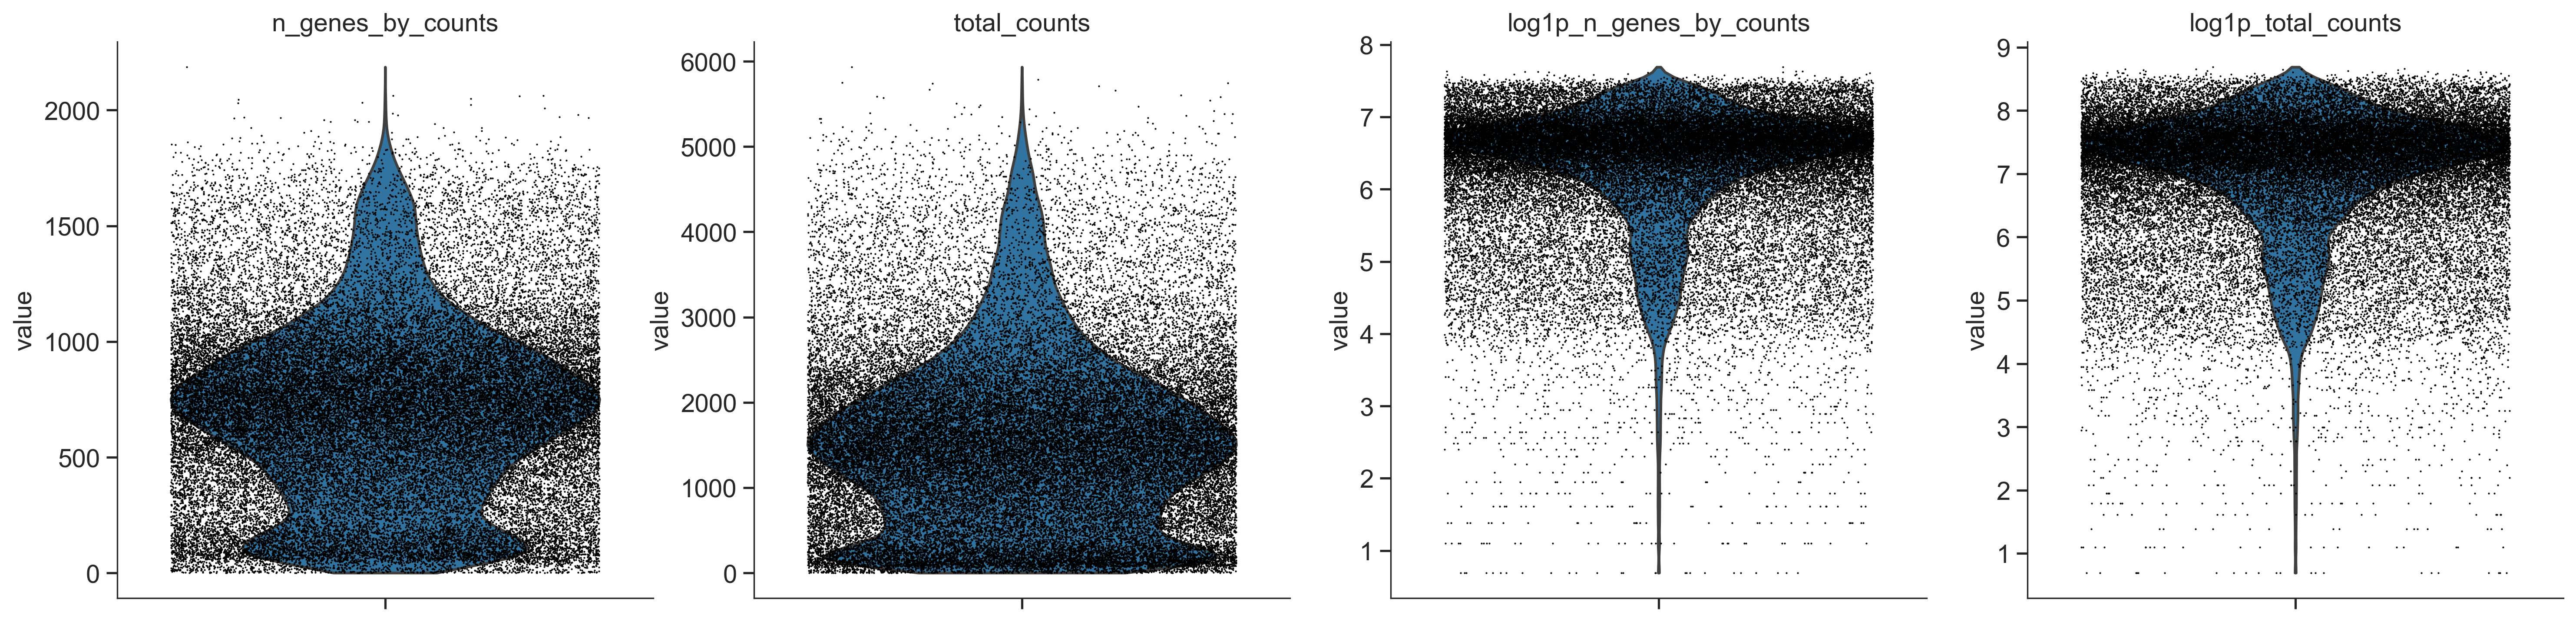

In [4]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, log1p=True, percent_top=None, qc_vars=["mt"], inplace=True)
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "log1p_n_genes_by_counts", "log1p_total_counts"],
    jitter=0.4,
    multi_panel=True,
    )

In [5]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=6)

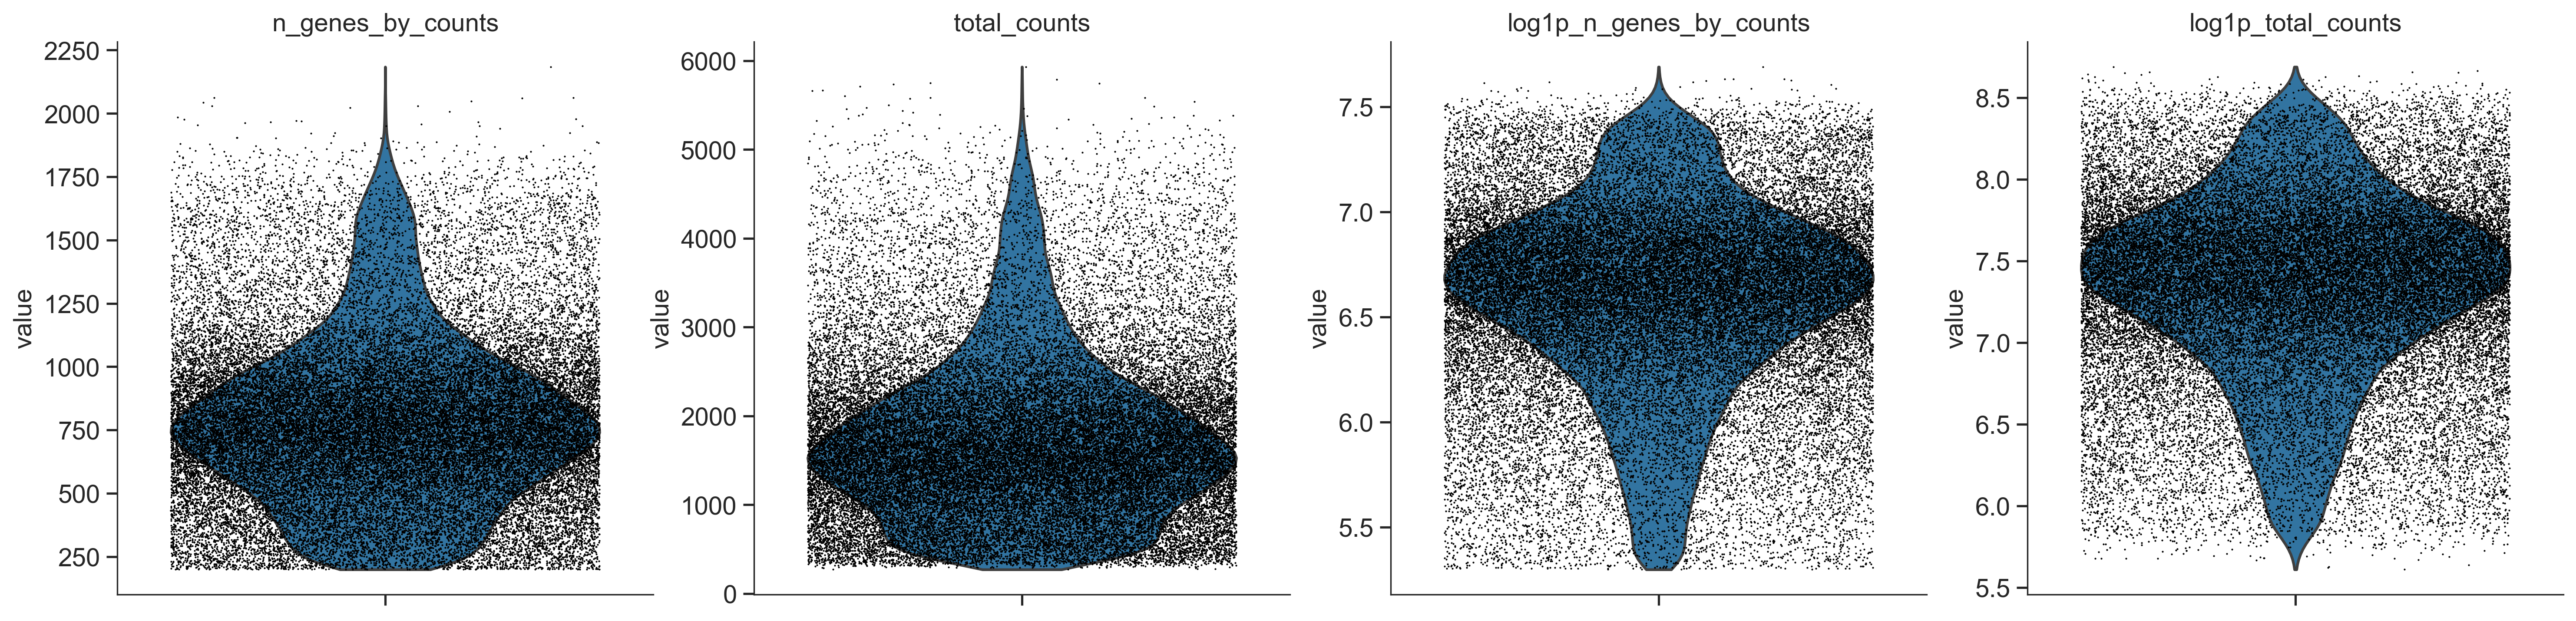

In [6]:
sc.pp.calculate_qc_metrics(adata, log1p=True, percent_top=None, qc_vars=["mt"], inplace=True)
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "log1p_n_genes_by_counts", "log1p_total_counts"],
    jitter=0.4,
    multi_panel=True,
    )

In [7]:
samples = ["A02993E1", 
           "A02989E1", 
           "A02994D6",
           "A02994E6",
           "C01939A4",
           "C01939A5",
           "C01939A6",
           "C01939B2", 
          ]
           

In [8]:
# The bin size can just be changed manually in the code. Easiest that way.

In [ ]:
# All C's.

for dataset in ["C01939A4" , "C01939A5", "C01939A6", "C01939B2"]:
    if not os.path.exists(f"{my_path}{dataset}"):
        os.makedirs(f"{my_path}{dataset}")
        
    if not os.path.exists(f"{my_path}{dataset}/processed"):
        os.makedirs(f"{my_path}{dataset}/processed")  
        
    for bin_size in [30, 50]:
        adata = sc.read_h5ad(f"/home/felix/data/processed_face/stereoseq/{dataset}/raw/{bin_size}.h5ad")
        
        adata.raw = None
        
        adata.var["mt"] = adata.var_names.str.startswith("MT-")
        sc.pp.calculate_qc_metrics(adata, log1p=False, percent_top=None, qc_vars=["mt"], inplace=True)
        
        sc.pp.filter_cells(adata, min_genes=200) #Changed
        sc.pp.filter_genes(adata, min_cells=6) #Changed

        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)
        
        
        sc.pp.highly_variable_genes(adata) #Changed
        adata.obsm["X_pca"] = sc.tl.pca( 
            sc.pp.scale(adata[:, adata.var.highly_variable].X, max_value=10),
            n_comps=30,
            zero_center=True,
        ) 

        
        sc.pp.neighbors(adata, n_neighbors=20)
        sc.tl.umap(adata)
        for resolution in [0.25, 0.5, 1]:
            sc.tl.leiden(adata, resolution=resolution, key_added=f"leiden_{resolution}")

        obsp_keys = list(adata.obsp.keys())
        for obsp in obsp_keys:
            del adata.obsp[obsp]
        varm_keys = list(adata.varm.keys())
        for varm in varm_keys:
            del adata.obsp[varm]

        adata.var = pd.DataFrame(index=adata.var_names)
        del adata.obs["x"], adata.obs["y"], adata.obs["orig.ident"]

        adata.obsm["X_spatial"] = adata.obsm["spatial"].copy()
        del adata.obsm["spatial"]

        adata.write_h5ad(f"{my_path}{dataset}/processed/{bin_size}.h5ad")
                

/home/felix/miniconda3/envs/commot/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#  Be careful with the number of CPUs used. 
# All A's.
for dataset in ["A02993E1" , "A02989E1", "A02994D6", "A02994E6"]:
    if not os.path.exists(f"{my_path}{dataset}"):
        os.makedirs(f"{my_path}{dataset}")
        
    if not os.path.exists(f"{my_path}{dataset}/processed"):
        os.makedirs(f"{my_path}{dataset}/processed")  
        
    for bin_size in [30, 50]:
        adata = sc.read_h5ad(f"/home/felix/data/processed_face/stereoseq/{dataset}/raw/{bin_size}.h5ad")
        adata.raw = None
        
        adata.var["mt"] = adata.var_names.str.startswith("MT-")
        sc.pp.calculate_qc_metrics(adata, log1p=False, percent_top=None, qc_vars=["mt"], inplace=True)
        
        sc.pp.filter_cells(adata, min_genes=200) #Changed
        sc.pp.filter_genes(adata, min_cells=6) #Changed

        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)
        
        
        sc.pp.highly_variable_genes(adata) #Changed
        adata.obsm["X_pca"] = sc.tl.pca( 
            sc.pp.scale(adata[:, adata.var.highly_variable].X, max_value=10),
            n_comps=30,
            zero_center=True,
        ) 

        
        sc.pp.neighbors(adata, n_neighbors=20)
        sc.tl.umap(adata)
        for resolution in [0.25, 0.5, 1]:
            sc.tl.leiden(adata, resolution=resolution, key_added=f"leiden_{resolution}")

        obsp_keys = list(adata.obsp.keys())
        for obsp in obsp_keys:
            del adata.obsp[obsp]
        varm_keys = list(adata.varm.keys())
        for varm in varm_keys:
            del adata.obsp[varm]

        adata.var = pd.DataFrame(index=adata.var_names)
        del adata.obs["x"], adata.obs["y"], adata.obs["orig.ident"]

        adata.obsm["X_spatial"] = adata.obsm["spatial"].copy()
        del adata.obsm["spatial"]

        adata.write_h5ad(f"{my_path}{dataset}/processed/{bin_size}.h5ad")
                

In [8]:
# Running COMMOT on stereo-seq data to test it.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from tqdm import tqdm
import squidpy as sq
from scipy.stats import spearmanr
import commot as ct
import time
import sys

sc.settings.verbosity = 1
sns.set(font_scale=1)
sc.settings.set_figure_params(dpi=150)
sns.set_style("ticks")

from matplotlib import cm
from matplotlib.colors import ListedColormap

cm_color = cm.get_cmap("Reds", 128)
cm_grey = cm.get_cmap("Greys", 128)

Reds = ListedColormap(np.vstack((
    cm_grey(np.linspace(0.2, 0.2, 1)),
    cm_color(np.linspace(0.1, 1, 128)),
)))

felix_data_path="/home/felix/projects/facial/felix/data/reprocessed_data"

batch = "C01939A4"

adata = sc.read_h5ad(f"{felix_data_path}/{batch}/processed/50.h5ad")

adata_dis500=adata.copy()

adata_dis500.obsm["spatial"] = adata_dis500.obsm["X_spatial"].copy()
del adata_dis500.obsm["X_spatial"]

df_cellchat =ct.pp.ligand_receptor_database(signaling_type="Secreted Signaling", # Select signaling type
                                            database="CellChat", # Select signaling db
                                            species='human')

In [9]:
adata_dis500

AnnData object with n_obs × n_vars = 41442 × 25417
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden_0.25', 'leiden_0.5', 'leiden_1'
    uns: 'bin_size', 'bin_type', 'hvg', 'key_record', 'leiden', 'log1p', 'merged', 'neighbors', 'resolution', 'sn', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'

In [10]:
df_cellchat

0              1          2                   3
0      TGFB1  TGFBR1_TGFBR2       TGFb  Secreted Signaling
1      TGFB2  TGFBR1_TGFBR2       TGFb  Secreted Signaling
2      TGFB3  TGFBR1_TGFBR2       TGFb  Secreted Signaling
3      TGFB1  ACVR1B_TGFBR2       TGFb  Secreted Signaling
4      TGFB1  ACVR1C_TGFBR2       TGFb  Secreted Signaling
...      ...            ...        ...                 ...
1194   UTS2B          UTS2R  UROTENSIN  Secreted Signaling
1195   UTS2B          SSTR5  UROTENSIN  Secreted Signaling
1196    BAG6           NCR3        BAG  Secreted Signaling
1197  LGALS9         HAVCR2   GALECTIN  Secreted Signaling
1198  LGALS9           CD44   GALECTIN  Secreted Signaling

[1199 rows x 4 columns]

In [11]:
adata_dis500[:,adata_dis500.var_names.isin(df_cellchat["0"].tolist())]

View of AnnData object with n_obs × n_vars = 41442 × 251
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden_0.25', 'leiden_0.5', 'leiden_1'
    uns: 'bin_size', 'bin_type', 'hvg', 'key_record', 'leiden', 'log1p', 'merged', 'neighbors', 'resolution', 'sn', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'

In [12]:
df_cellchat_filtered = ct.pp.filter_lr_database(df_cellchat, adata_dis500, min_cell_pct=0.05)

In [13]:
df_cellchat_filtered

0              1          2                   3
0     BMP5  BMPR1A_ACVR2A        BMP  Secreted Signaling
1     BMP5   BMPR1A_BMPR2        BMP  Secreted Signaling
2     BMP5  BMPR1B_ACVR2A        BMP  Secreted Signaling
3     BMP5   BMPR1B_BMPR2        BMP  Secreted Signaling
4     BMP7  BMPR1A_ACVR2A        BMP  Secreted Signaling
5     BMP7   BMPR1A_BMPR2        BMP  Secreted Signaling
6     BMP7  BMPR1B_ACVR2A        BMP  Secreted Signaling
7     BMP7   BMPR1B_BMPR2        BMP  Secreted Signaling
8    PDGFC         PDGFRA       PDGF  Secreted Signaling
9     IGF2          IGF1R        IGF  Secreted Signaling
10    IGF2          IGF2R        IGF  Secreted Signaling
11    SPP1    ITGAV_ITGB1       SPP1  Secreted Signaling
12    SPP1    ITGAV_ITGB5       SPP1  Secreted Signaling
13    SPP1    ITGA9_ITGB1       SPP1  Secreted Signaling
14     MDK           SDC1         MK  Secreted Signaling
15     MDK           SDC2         MK  Secreted Signaling
16     MDK           LRP1         MK  Secreted Signaling
17     MDK            NCL         MK  Secreted Signaling
18     PTN           SDC1        PTN  Secreted Signaling
19     PTN           SDC2        PTN  Secreted Signaling
20     PTN            NCL        PTN  Secreted Signaling
21   POSTN    ITGAV_ITGB5  PERIOSTIN  Secreted Signaling
22  SEMA3A    NRP1_PLXNA2      SEMA3  Secreted Signaling
23  SEMA3A    NRP1_PLXNA4      SEMA3  Secreted Signaling
24  SEMA3C    NRP1_PLXNA2      SEMA3  Secreted Signaling
25  SEMA3C    NRP1_PLXNA4      SEMA3  Secreted Signaling
26  SEMA3D    NRP1_PLXNA2      SEMA3  Secreted Signaling
27  SEMA3D    NRP1_PLXNA4      SEMA3  Secreted Signaling
28  SEMA3C    NRP2_PLXNA2      SEMA3  Secreted Signaling
29  SEMA3C    NRP2_PLXNA4      SEMA3  Secreted Signaling
30  SEMA3D    NRP2_PLXNA2      SEMA3  Secreted Signaling
31  SEMA3D    NRP2_PLXNA4      SEMA3  Secreted Signaling
32  SEMA3F    NRP2_PLXNA2      SEMA3  Secreted Signaling
33  SEMA3F    NRP2_PLXNA4      SEMA3  Secreted Signaling